# Imports

In [2]:
import numpy as np
import pandas as pd
import xml
import xml.etree.ElementTree as ET

# Parsing Util

In [3]:
def parse(element: xml.etree.ElementTree.Element):
    """
    Parses an xml element into a dictionary.
    """
    d = {}
    if not element.text or '\t' in element.text:
        for child in element:
            if child.tag in d:
                if type(d[child.tag]) is list:
                    d[child.tag].append(parse(child))
                else:
                    d[child.tag] = [d[child.tag], parse(child)]
            else:
                d[child.tag] = parse(child)
    else:
        return element.text
    
    return d

    

In [18]:
import os
names = list(set([name.split('.')[0] for name in os.listdir('data')]))

In [5]:
import random
import cv2

def sample_data(ids: list[tuple[str, dict, np.ndarray]]):
    """
    Parses the xml files and loads the images for the given ids
    """
    sample = []
    for id in ids:
        tree = xml.etree.ElementTree.parse(f'data/{id}.xml')
        root = tree.getroot()
        annotation = parse(root)
        image = cv2.imread(f'data/{id}.jpg')
        sample.append((id, image, annotation))
    
    return sample

# Visualization

In [6]:
from matplotlib import pyplot as plt
from matplotlib import patches

def visualize_sample(sample):
    """
    Plot the images with the bounding boxes for the given sample
    """
    num_samples = len(sample)
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i, (id, image, annotation) in enumerate(sample):
        print(annotation)
        ax = axes[i]
        ax.imshow(image)
        if "object" in annotation:
            if type(annotation["object"]) is not list:
                annotation["object"] = [annotation["object"]]
            for obj in annotation["object"]:
                x = int(obj["bndbox"]["xmin"])
                y = int(obj["bndbox"]["ymin"])
                w = int(obj["bndbox"]["xmax"]) - x
                h = int(obj["bndbox"]["ymax"]) - y
                rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
                # label the box
                ax.text(x, y, obj["name"], color='r')
                ax.add_patch(rect)
        ax.set_title(id)
        ax.axis("off")


In [7]:
def visualize_random_sample(names: list[str], num_samples: int):
    """
    Visualizes a random sample of the given data
    """
    ids = random.sample(names, num_samples)
    sample = sample_data(ids)
    visualize_sample(sample)

{'folder': {}, 'filename': 'upper_811454.jpg', 'path': 'upper_811454_png.rf.e7ef91c57048ade4aa054c745c0a7878.jpg', 'source': {'database': 'roboflow.ai'}, 'size': {'width': '640', 'height': '480', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'goalspot', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'occluded': '0', 'bndbox': {'xmin': '613', 'xmax': '641', 'ymin': '63', 'ymax': '82'}}, {'name': 'robot', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'occluded': '0', 'bndbox': {'xmin': '557', 'xmax': '641', 'ymin': '1', 'ymax': '43'}}]}
{'folder': 'combinate', 'filename': 'lower_559896.jpg', 'path': '/home/vboxuser/Desktop/dataset_mf_1001/combinate/lower_559896.png', 'source': {'database': 'Unknown'}, 'size': {'width': '320', 'height': '240', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'ball', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '17', 'ymin': '40', 'xmax': '64', 'ymax': '90'}}, {'name': 'robot', 'pose': 'U

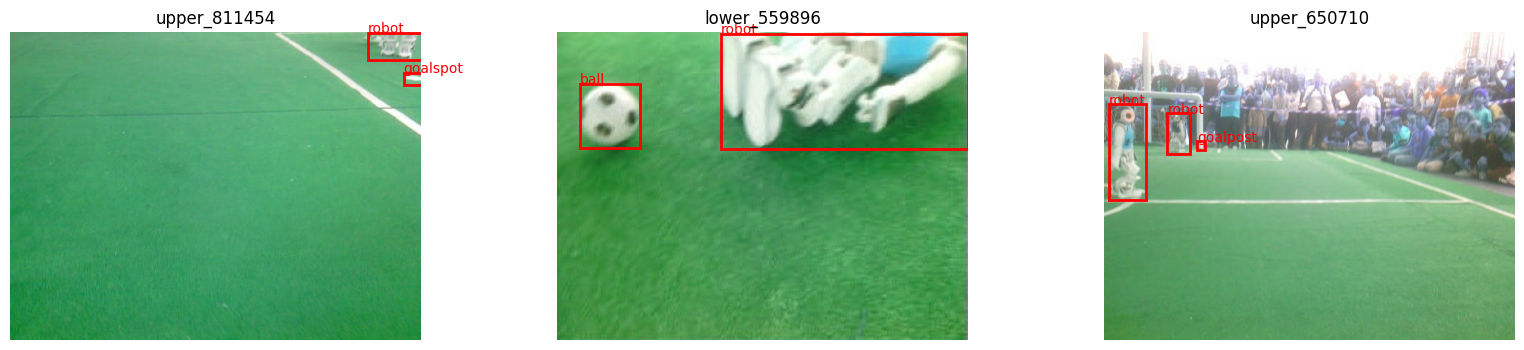

In [8]:
visualize_random_sample(names, 3)

# Ballssss

In [9]:
ball_data = []
for name in names:
    tree = xml.etree.ElementTree.parse(f'data/{name}.xml')
    root = tree.getroot()
    annotation = parse(root)
    if "object" in annotation:
        if type(annotation["object"]) is not list:
            annotation["object"] = [annotation["object"]]
        for obj in annotation["object"]:
            if obj["name"] == "ball":
                ball_data.append(name)

{'folder': 'images_28_aprile', 'filename': 'upper_609566.jpg', 'path': '/home/francesco/Desktop/dataset_28_aprile/images_28_aprile/upper_609566.png', 'source': {'database': 'Unknown'}, 'size': {'width': '640', 'height': '480', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'goalspot', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '587', 'ymin': '436', 'xmax': '640', 'ymax': '480'}}, {'name': 'ball', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '501', 'ymin': '177', 'xmax': '547', 'ymax': '221'}}, {'name': 'robot', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '540', 'ymin': '1', 'xmax': '640', 'ymax': '260'}}]}
{'folder': 'combinate', 'filename': 'upper_932388.jpg', 'path': '/home/vboxuser/Desktop/dataset_mf_1001/combinate/upper_932388.png', 'source': {'database': 'Unknown'}, 'size': {'width': '640', 'height': '480', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'robot', 'pose'

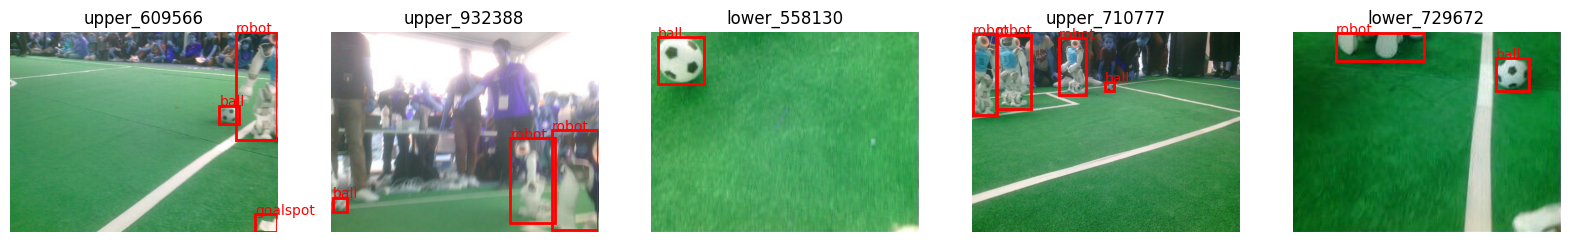

In [10]:
visualize_random_sample(ball_data, 5)

(np.float64(-0.5), np.float64(319.5), np.float64(239.5), np.float64(-0.5))

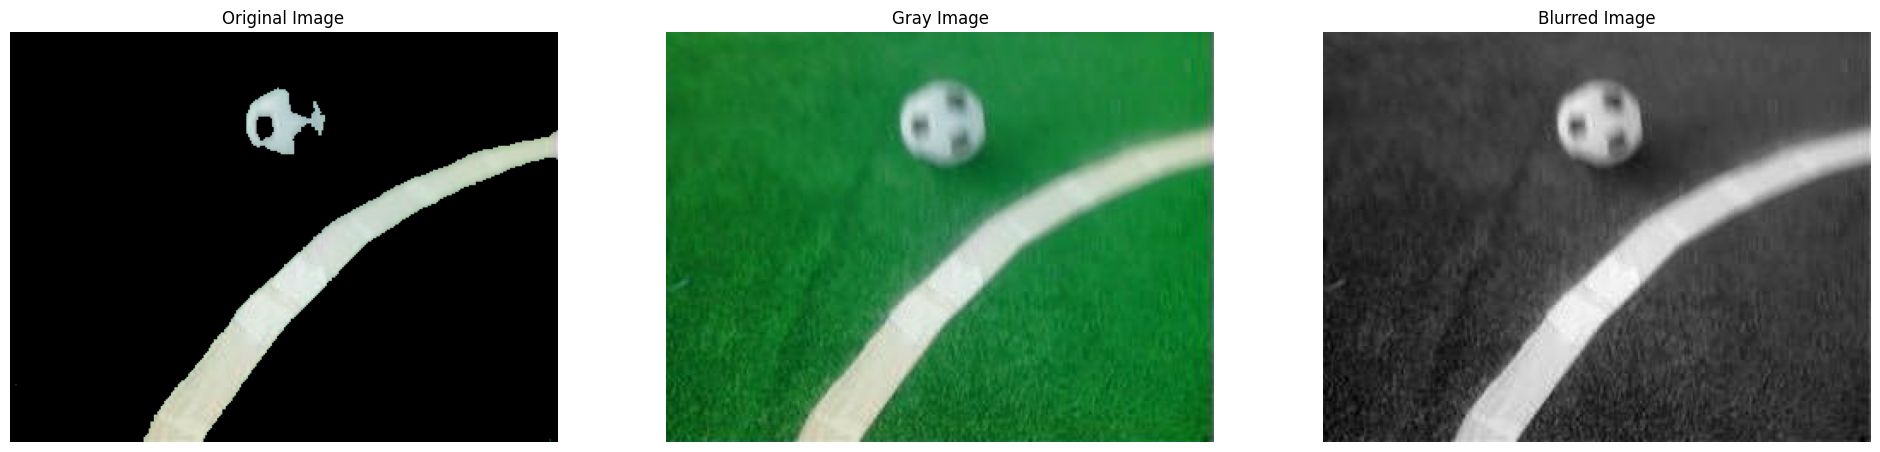

In [14]:
import cv2
import numpy as np

id, image, annotation = sample_data(['lower_505625'])[0]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Hough Circle Transform to detect circular objects
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                            param1=50, param2=30, minRadius=20, maxRadius=100)

lower_black = np.array([0, 0, 0])       # Minimum HSV for black
upper_black = np.array([70, 70, 70]) # Maximum HSV for black

# White: high brightness and low saturation
lower_white = np.array([160, 160, 160])    # Minimum HSV for white
upper_white = np.array([255, 255, 255]) # Maximum HSV for white

# Create masks for black and white regions
black_mask = cv2.inRange(image, lower_black, upper_black)
white_mask = cv2.inRange(image, lower_white, upper_white)

# Combine the masks
black_white_mask = cv2.bitwise_or(black_mask, white_mask)

# Apply the mask to the original image
black_white_filtered = cv2.bitwise_and(image, image, mask=black_white_mask)


fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].imshow(black_white_filtered)
ax[0].set_title("Original Image")
ax[1].imshow(image)
ax[1].set_title("Gray Image")
ax[2].imshow(gray, cmap="gray")
ax[2].set_title("Blurred Image")

if "object" in annotation:
    if type(annotation["object"]) is not list:
        annotation["object"] = [annotation["object"]]

    for obj in annotation["object"]:
        x = int(obj["bndbox"]["xmin"])
        y = int(obj["bndbox"]["ymin"])
        w = int(obj["bndbox"]["xmax"]) - x
        h = int(obj["bndbox"]["ymax"]) - y
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
        # ax[0].add_patch(rect)

if circles is not None:
    circles = np.uint16(np.around(circles))  # Round to integer values
    for circle in circles[0, :]:
        x, y, r = circle
        circle = patches.Circle((150, 100), radius=30, edgecolor='red', facecolor='none', linewidth=2)
        # ax[0].add_patch(circle)

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")


# YOLO

In [25]:
labels = set()

for name in names:
    obj = sample_data([name])[0][2]
    if "object" not in obj:
        continue
    if type(obj["object"]) is not list:
        obj["object"] = [obj["object"]]
    for o in obj["object"]:
        labels.add(o["name"])

label_indexes = {label: i for i, label in enumerate(labels)}


In [77]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(names, test_size=0.2, random_state=42)

In [87]:
os.makedirs('datasets/2023_1/train/images', exist_ok=True)
os.makedirs('datasets/2023_1/train/labels', exist_ok=True)
os.makedirs('datasets/2023_1/test/images', exist_ok=True)
os.makedirs('datasets/2023_1/test/labels', exist_ok=True)
print("Created new dataset directories")

def process_training_data(dir, id, image, annotation):
    if "object" not in annotation:
        return
    if type(annotation["object"]) is not list:
        annotation["object"] = [annotation["object"]]

    with open(f'datasets/2023_1/{dir}/labels/{id}.txt', 'w') as f:
        width = float(annotation['size']['width'])
        height = float(annotation['size']['height'])
        for o in obj["object"]:
            xmin = float(o["bndbox"]["xmin"])
            ymin = float(o["bndbox"]["ymin"])
            xmax = float(o["bndbox"]["xmax"])
            ymax = float(o["bndbox"]["ymax"])

            x = (xmin + (xmax - xmin) / 2) / width
            y = (ymin + (ymax - ymin) / 2) / height
            w = (xmax - xmin) / width
            h = (ymax - ymin) / height

            if x > 1 or y > 1 or w > 1 or h > 1 or x < 0 or y < 0 or w < 0 or h < 0:
                print("Invalid data")
                print(id)
                print(width, height)
                print(xmin, ymin, xmax, ymax)
                print(x, y, w, h)

            f.write(f"{label_indexes[o['name']]} {x} {y} {w} {h}\n")

    cv2.imwrite(f'datasets/2023_1/{dir}/images/{id}.jpg', image)

for id, image, annotation in sample_data(train):
    process_training_data('train', id, image, annotation)
for id, image, annotation in sample_data(val):
    process_training_data('val', id, image, annotation)


Created new dataset directories
Invalid data
lower_937194
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_664806
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_497096
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_489167
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_637188
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_512121
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_536275
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_714780
320.0 240.0
80.0 2.0 287.0 333.0
0.5734375 0.6979166666666666 0.646875 1.3791666666666667
Invalid data
lower_554032
320.0 240.0
80

In [75]:
label_indexes.keys()

dict_keys(['centerspot', 'robot', 'ball', 'goalpost', 'goalspot'])

In [86]:
val[-2]

'lower_851973'